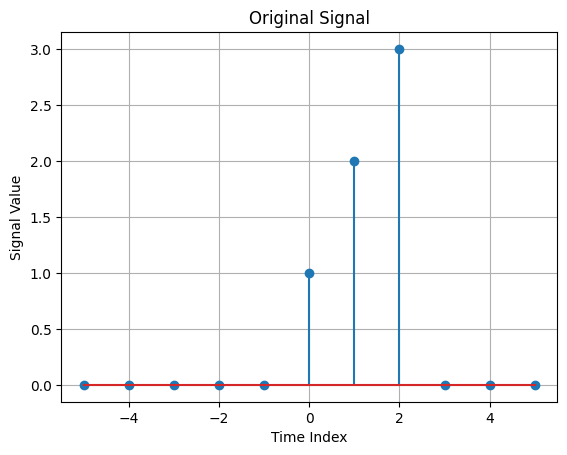

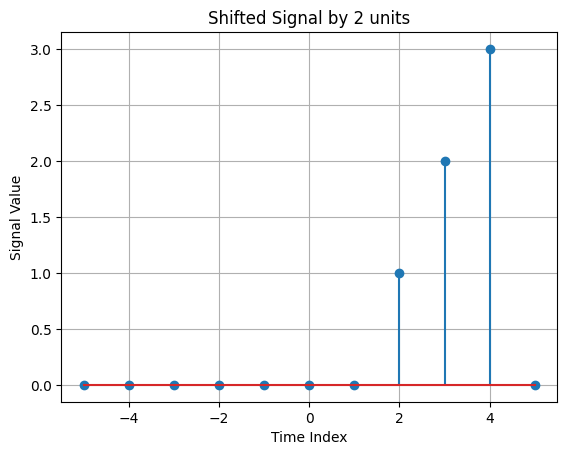

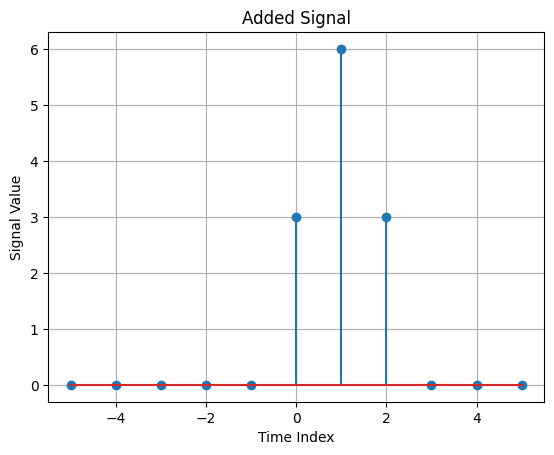

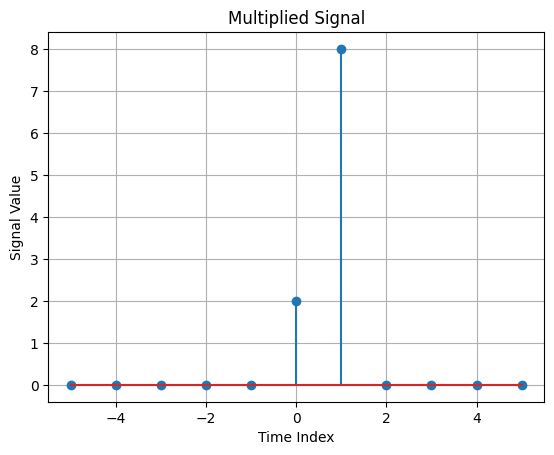

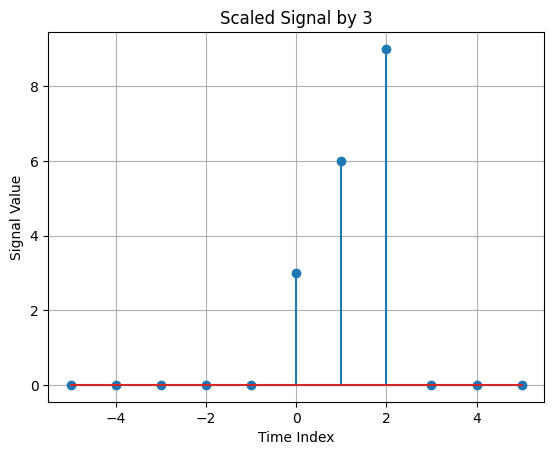

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Create a signal array of size 2 * INF + 1 (to cover -INF to INF)
        self.time_indices = np.arange(-INF, INF + 1)

    def set_value_at_time(self, time, value):
        if -self.INF <= time <= self.INF:
            self.values[time + self.INF] = value  # Shift the index for proper placement
        else:
            raise ValueError("Time index out of range")

    def shift_signal(self, shift):
        shifted_signal = DiscreteSignal(self.INF)
        shifted_signal.values = np.roll(self.values, shift)
        return shifted_signal

    def add(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        added_signal = DiscreteSignal(self.INF)
        added_signal.values = self.values + other.values
        return added_signal

    def multiply(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        multiplied_signal = DiscreteSignal(self.INF)
        multiplied_signal.values = self.values * other.values
        return multiplied_signal

    def multiply_const_factor(self, factor):
        scaled_signal = DiscreteSignal(self.INF)
        scaled_signal.values = self.values * factor
        return scaled_signal

    def plot(self, title="Discrete Signal", color='blue'):
        plt.stem(self.time_indices, self.values)
        plt.title(title)
        plt.xlabel("Time Index")
        plt.ylabel("Signal Value")
        plt.grid()
        plt.show()
    

# Example Usage:
if __name__ == "__main__":
    INF = 5  # Define the range of the signal
    signal1 = DiscreteSignal(INF)

    # Set values for signal1
    signal1.set_value_at_time(0, 1)
    signal1.set_value_at_time(1, 2)
    signal1.set_value_at_time(2, 3)

    # Plot the original signal
    signal1.plot(title="Original Signal")

    # Shift the signal by 2 units
    shift_unit = 2
    shifted_signal = signal1.shift_signal(shift_unit)
    shifted_signal.plot(title="Shifted Signal by "+str(shift_unit) + " units")

    # Add two signals
    signal2 = DiscreteSignal(INF)
    signal2.set_value_at_time(0, 2)
    signal2.set_value_at_time(1, 4)
    added_signal = signal1.add(signal2)
    added_signal.plot(title="Added Signal")

    # Multiply two signals element-wise
    multiplied_signal = signal1.multiply(signal2)
    multiplied_signal.plot(title="Multiplied Signal")

    # Multiply by a constant
    scaled_signal = signal1.multiply_const_factor(3)
    scaled_signal.plot(title="Scaled Signal by 3")
